# PCA theroy

#used to reduce dimention

#here we see theory,coding excercise

PCA-->is  dimention reduction tencnique as  it helps to reduce the dimention.


Sometimes we have many columns in our dataset,but all not not important,

only few features are important.

what if we get rid of non-important featutes?

1-->faster training and interface

2-->data visulization becomes easilier


PCA->Prinviplae compotnent Analysis
this is a process of feguring out most important features or principle compotents that has 

the most impact on the Target Variable



PCA will also create new compontent like PCA1,PCA2,PCA2,...

{suppose we reduce two dimention to one dimention}

{for example in iris dataset sample where sepal width and sepal height will 
 
 determine what kind of flower it is.suppose we draw a scatter plot,if we draw a line (slanting)

which cover maximun variance in terms of features is,if we draw perpendicular line ,which

shows  second most variances is.And these are called Principle compontent}

{for 2 dimenstion we get 2PCA,suppose if we have 100 dimnetion and if we apply pca we can figure 
 
 out 10 most important pieces of principle compotent}

{ for 100 features we can actuaclly create 100 pca on the descending order on their impact of 
 
 target variables}

suppose there are 64 data,if we specify PCA(n_compotnet=6)

which means we get 6 most import feature like pca1,pca2..pca6

where pca1 is first very important feature.pca2 is second most and so on

Few things before  applying pca-->we need to scale the features

# coding

In [2]:
import pandas as pd
from sklearn.datasets import load_digits#hand written digits dataset

In [3]:
#load the dataset
dataset=load_digits()

In [4]:
#to call the dataset
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
#to see the shape
dataset.data.shape

(1797, 64)

In [8]:
#lets see the first data:it is flat one dimentional array of 64 pixel
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
#to see in visualize as matplotlib,we need to convert this into 2 dimentional array
#this is done by calling reshape(8,),since it is numpy it convert 1 dimention array into 2 dimensional
#array

dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

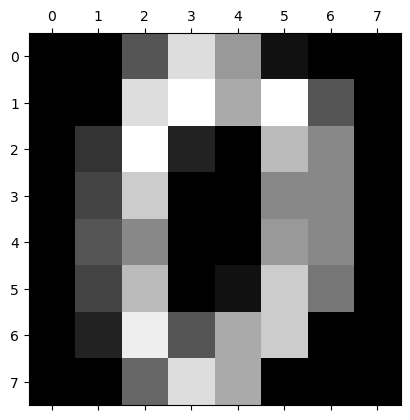

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()#using grey color
plt.matshow(dataset.data[0].reshape(8,8))#matshow means=matrix show

<Figure size 640x480 with 0 Axes>

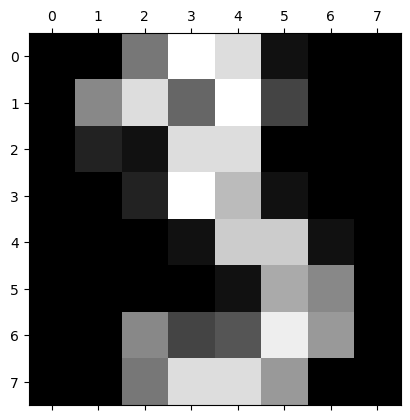

In [13]:
#the above is zero,same way we try dataset[1]
plt.gray()#using grey color
plt.matshow(dataset.data[3].reshape(8,8))

In [14]:
#lets focus on target
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
#it is huge one
#lets see the unique
import numpy as np
np.unique(dataset.target)#here the numbers are between 0 to 9

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
dataset.target[8]

8

In [18]:
#dataset.data[3].-->is feature
#dataset.target[8]-->is class
#we are classificying it into 10 class from 0 to  9

In [19]:
#lets create a dataframe
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)#if we didnt give column name we will get numbers
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [20]:
#in above it looks like min and max is 0-16,lets check by describe
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [21]:
#lets store out x and y value
x=df
y=dataset.target

In [24]:
#x is df
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [25]:
#y is target class which tell between 0to9
y


array([0, 1, 2, ..., 8, 9, 8])

Feature Scaling

In [26]:
#scale the feature before building the machine learning model and store in separate variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [27]:
#split train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)

#Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)#to measure the accurancy

0.9722222222222222

#lets start PCA

In [30]:
from sklearn.decomposition import PCA
#here we can have 2 types of parameter
#1--> pca(n_compotnet=2 0r 5) 
#2---?pca(0.95)-->retain 95% of usefull feature and then create new dimention(we are not saying how many dimention)

pca=PCA(0.95)
x_pca=pca.fit_transform(x)#here we get new pca

In [31]:
x_pca.shape

(1797, 29)

In [ ]:
#look we get only 29 columns,but go back and see original dataframe x,it get 64 coulmns

In [34]:
#to see the variance
pca.explained_variance_ratio_


array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [36]:
#to see how many compontent,which is basically column
pca.n_components_

29

In [37]:
#now we use our new dataframe to train our model
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [39]:
model=LogisticRegression()
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

In [46]:
#to avoid model=LogisticRegression()
 
model=LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.9694444444444444

In [ ]:
#accurancy is almost similiAR

#PCA-->no of component

In [43]:
pca=PCA(n_components=2)# here we are telling we want 2 important feature
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [44]:
x_pca

array([[ -1.25946691,  21.27488454],
       [  7.95761406, -20.76870071],
       [  6.99192169,  -9.95598629],
       ...,
       [ 10.80128169,  -6.96025031],
       [ -4.87209737,  12.42395357],
       [ -0.34439317,   6.36555155]])

In [45]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [47]:
#when we use n_compotnet the accurancy wil be low,now we use same code and chk the accurany
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=30)
model=LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.6083333333333333

In [48]:
#here the accurancy is low but is fast